In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Salary Prediction

![](https://www.gannett-cdn.com/-mm-/389f33b6050a2664d0a5c4c7964c4fab0747cd63/c=0-38-2024-1181/local/-/media/2015/10/26/USATODAY/USATODAY/635814567737908846-salary.jpg?width=2024&height=1143&fit=crop&format=pjpg&auto=webp)

In [2]:
df = pd.read_csv('../input/salary-prediction-classification/salary.csv')

In [3]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
sex = pd.get_dummies(df['sex'],drop_first = 'first')

In [6]:
education = pd.get_dummies(df['education'],drop_first='first')

In [7]:
occupation = pd.get_dummies(df['occupation'],drop_first='first')

In [8]:
marirtal = pd.get_dummies(df['marital-status'],drop_first = 'first')

In [9]:
workclass = pd.get_dummies(df['workclass'],drop_first='first')

In [10]:
data = df[['age','education-num','capital-gain','capital-loss','hours-per-week']]

In [11]:
x = pd.concat([data,workclass,marirtal,occupation,education,sex],axis =1)

In [12]:
x

,age,education-num,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,...,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Male
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,50,13,0,0,13,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,28,13,0,0,40,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
32557,40,9,0,0,40,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
32558,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
32559,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [13]:
df['salary'] = df['salary'].str.replace('<=','less then')
df['salary'] = df['salary'].str.replace('>','greater then')

In [14]:
y = df['salary']
y

0            less then50K
1            less then50K
2            less then50K
3            less then50K
4            less then50K
               ...       
32556        less then50K
32557     greater then50K
32558        less then50K
32559        less then50K
32560     greater then50K
Name: salary, Length: 32561, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
model = GradientBoostingClassifier(max_depth = 4)
model.fit(xtrain,ytrain)

GradientBoostingClassifier(max_depth=4)

In [19]:
model.score(xtrain,ytrain)

0.8764588452088452

In [20]:
model.score(xtest,ytest)

0.8704130201136189

In [21]:
cls = []
for max_depth in range(1,10):
    dr = GradientBoostingClassifier(max_depth = max_depth)
    dr.fit(xtrain,ytrain)
    cls.append(dr)

In [22]:
train_score =[dr.score(xtrain,ytrain) for dr in cls]
test_score =[dr.score(xtest,ytest) for dr in cls]

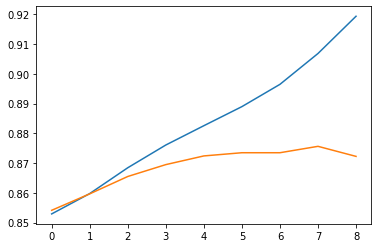

In [23]:
plt.plot(train_score)
plt.plot(test_score)